# Carga de métricas

In [74]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Función que devuelve el score previamente guardado
def score_from_pkl(path):
    with open(path, 'rb') as file:
        return pickle.load(file)

In [3]:
# Los modelos
paths = ["./Score/model_1_scores.pkl", 
         "./Score/model_2_scores.pkl", 
         "./Score/model_3_scores.pkl"]

In [4]:
# Guardamos las scores
scores = [score_from_pkl(path) for path in paths]

In [6]:
# Pasamos a dataframe
df = pd.DataFrame(scores)
df.T

,0,1,2
Name,TF-IDF + Logistic Regression,BoW + Logistic Regression,Word2Vec + LSTM
Confusion Matrix train,"[[11585, 7880], [3054, 97481]]","[[10245, 9220], [3052, 97483]]","[[15555, 3910], [2361, 98174]]"
Report train,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...
Accuracy train,0.908883,0.897733,0.947742
Confusion Matrix val,"[[2719, 2147], [949, 24185]]","[[2395, 2471], [904, 24230]]","[[3163, 1703], [1183, 23951]]"
Report val,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...
Accuracy val,0.8968,0.8875,0.9038
Confusion Matrix test,"[[4566, 3544], [1619, 40271]]","[[4008, 4102], [1491, 40399]]","[[5293, 2817], [1819, 40071]]"
Report test,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...
Accuracy test,0.89674,0.88814,0.90728


# Accuracy
Esta métrica ha sido la función de pérdidas de cada modelo, esta mide la exactitud, es decir la probabilidad de acierto en cada predicción

In [7]:
df[['Name', 'Accuracy train', 'Accuracy val', 'Accuracy test']]

,Name,Accuracy train,Accuracy val,Accuracy test
0,TF-IDF + Logistic Regression,0.908883,0.8968,0.89674
1,BoW + Logistic Regression,0.897733,0.8875,0.88814
2,Word2Vec + LSTM,0.947742,0.9038,0.90728


Centrandonos en los resultados de test, podemos ver que los resultados son bastantes similares, aunque podemos observar el Word2Vec con las redes LSTM, funciona un poquito mejor

# Confusion Matrix
Matriz que nos da información sobre los aciertos y fallos en los positivos o negativos

In [85]:
def plot_conf_matrix(matrix, title):
    ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')
    
    ax.set_title(title[0]);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    
    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['negativo','positivo'])
    ax.yaxis.set_ticklabels(['negativo','positivo'])
    # Display the visualization of the Confusion Matrix.

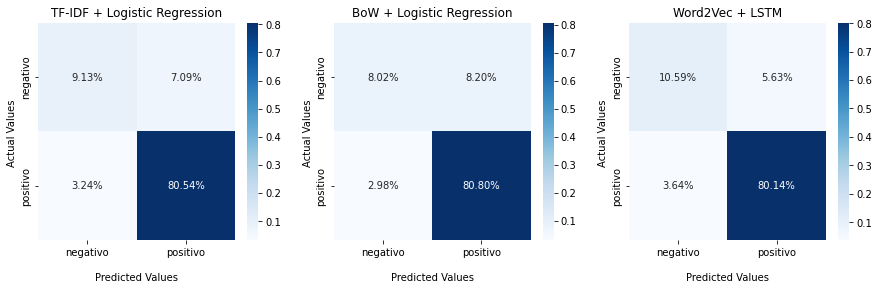

In [86]:
plt.rcParams["figure.figsize"] = (15,4)
plt.figure("Confusion Matrix")
plt.subplot(1,3,1)
plot_conf_matrix(df.iloc[0][['Confusion Matrix test']][0], df.iloc[0][['Name']].values)
plt.subplot(1,3,2)
plot_conf_matrix(df.iloc[1][['Confusion Matrix test']][0], df.iloc[1][['Name']].values)
plt.subplot(1,3,3)
plot_conf_matrix(df.iloc[2][['Confusion Matrix test']][0], df.iloc[2][['Name']].values)
plt.show()

Comparando las gráficas, podemos observar que el que **mas acierto en sentimiento negativos** tiene es el modelo de Word2Vec + LSTM, y en **sentimiento positivo** el de BoW + Logistic Regression, por otra parte el modelo que **menos falla en sentimiento positivo** es el de BoW + Logistic Regression, y el que **menos falla en sentimiento negativo** es el de word2Vec + LSTM

Por otra parte para la elección del modelo, tenemos que pensar que queremos ¿priorizar los aciertos postivios, negativos, que falle menos en positivo, o que falle menos en negativo? la matriz de confusión nos ayuda en ese aspecto

# Precisision, recall, f1-score, support

In [13]:
print("Name: {}\n".format(df.iloc[0][['Name']]))
print("{}".format(df.iloc[0][['Report test']][0]))

Name: Name    TF-IDF + Logistic Regression
Name: 0, dtype: object

              precision    recall  f1-score   support

           0       0.74      0.56      0.64      8110
           1       0.92      0.96      0.94     41890

    accuracy                           0.90     50000
   macro avg       0.83      0.76      0.79     50000
weighted avg       0.89      0.90      0.89     50000



In [14]:
print("Name: {}\n".format(df.iloc[1][['Name']]))
print("{}".format(df.iloc[1][['Report test']][0]))

Name: Name    BoW + Logistic Regression
Name: 1, dtype: object

              precision    recall  f1-score   support

           0       0.73      0.49      0.59      8110
           1       0.91      0.96      0.94     41890

    accuracy                           0.89     50000
   macro avg       0.82      0.73      0.76     50000
weighted avg       0.88      0.89      0.88     50000



In [15]:
print("Name: {}\n".format(df.iloc[2][['Name']]))
print("{}".format(df.iloc[2][['Report test']][0]))

Name: Name    Word2Vec + LSTM
Name: 2, dtype: object

              precision    recall  f1-score   support

           0       0.74      0.65      0.70      8110
           1       0.93      0.96      0.95     41890

    accuracy                           0.91     50000
   macro avg       0.84      0.80      0.82     50000
weighted avg       0.90      0.91      0.90     50000



* **Precisión**

$TP / (TP + FP)$
La precisión nos da una idea del acierto entre el total de datos ya sea para positivos o negativos, podemos comprobar que hay mas precisión en sentimiento positivo que negativo en todos los modelos

* **Recall**

$TP / (TP + FN)$
Esta es una medición útil si queremos priorizar los aciertos en sentimiento positivo por encima de los fallos negativos en este aspecto, si por ejemplo no nos importa permitir que se cuelen mas falsos positivos (o viceversa) es la medida a tener en cuenta

* **F1-score**

Esta es una medida que combina precisión y recall mediante una media harmónica, esta medida es importante y útil en casos como este donde nuestros datos están desbalanceados a favor de sentimientos positivos

* **support**

Nos da simplemente el número de cada clase, podemos ver claramente el desbalanceo aquí

# Conclusión

* **El dataset**

Partimos de un dataset **claramente desbalanceado**, lo cual puede ser engañoso determinadas métricas, una opción para corregir esto, si tenemos bastante samples, sería la opción de subsamplear la clase mayoritaria (reviews positivas), o penalizar más la clase mayoritaria que la otra.

* **Extracción de características**

Hemos podido comprobar 3 modelos de extracción de características, **TF-IDF**, **Bag of Words**, y **Word2Vec (Skip-gram y Cbow)**, cualquiera de las 3 van a extraer unos pesos a partir de un texto dependiendo de un critero, a mi pensar, parece mas completo Word2Vec para la extracción del contexto, que en este caso (análisis del sentimiento), creo que prima, sin embargo parece que todas se han portado muy bien.

* **Modelos**

En este caso se ha probado 2 modelos, **Logistic Regression** y **LSTM** (con pesos embebidos del Word2Vec en la capa inicial), la primera se a comportado muy bien, sobretodo en el parametro de regulación C=10, además son mucho mas rápidos que las LSTM, en cuanto a esta última, es mucho mas compeja y requiere mas recursos y tiempo, sin embargo, los resultados son muy buenos, y con tiempo y recursos suficientes se puede conseguir mejorar, sin embargo, parece mas viable hoy en día usar modelos preentrenados (como GPT2) y entrenar solo las primeras capas para adaptar el modelo